# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[255 255 255 255]


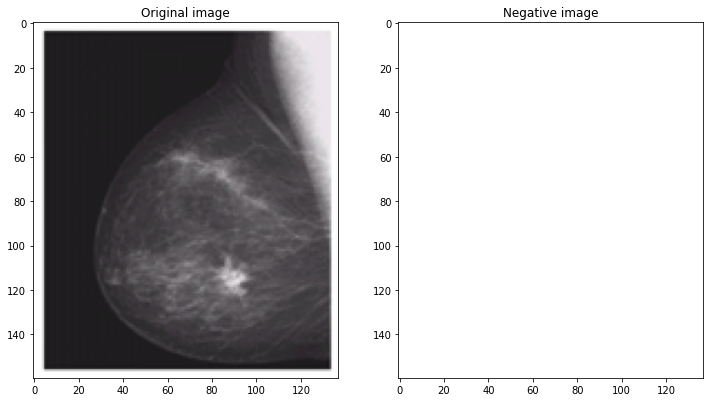

In [33]:
'''
1
Negative Transformation
'''
image1 = io.imread('imgs/Picture1.png')
def Negative(image):
    negative_image = np.zeros(image.shape)
    for i in range(0, negative_image.shape[0]):
        for j in range(0, negative_image.shape[1]):
            negative_image[i][j] = 255 - image[i][j]
    return negative_image

show_images([image1, Negative(image1)], ['Original image' ,'Negative image'])


C:\Users\mostafa\AppData\Local\Temp/ipykernel_7108/1873333680.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image2 = rgb2gray(io.imread('imgs/Picture2.png'))


0.996078431372549


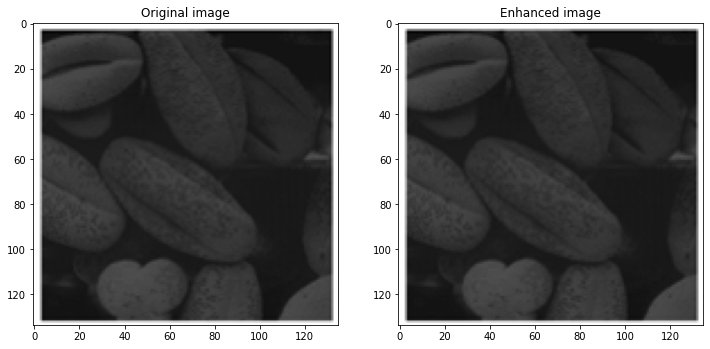

In [27]:
'''
2
Contrast Enhancement
'''
image2 = rgb2gray(io.imread('imgs/Picture2.png'))

def contrast_enhancement(image):
    enhanced_image = np.copy(image)
    for i in range(0, enhanced_image.shape[0]):
        for j in range(0, enhanced_image.shape[1]):
            if enhanced_image[i][j] <= 100 :
                enhanced_image[i][j] = 1.5 * enhanced_image[i][j] + 50
    return enhanced_image

show_images([image2, contrast_enhancement(image2)], ['Original image', 'Enhanced image'])

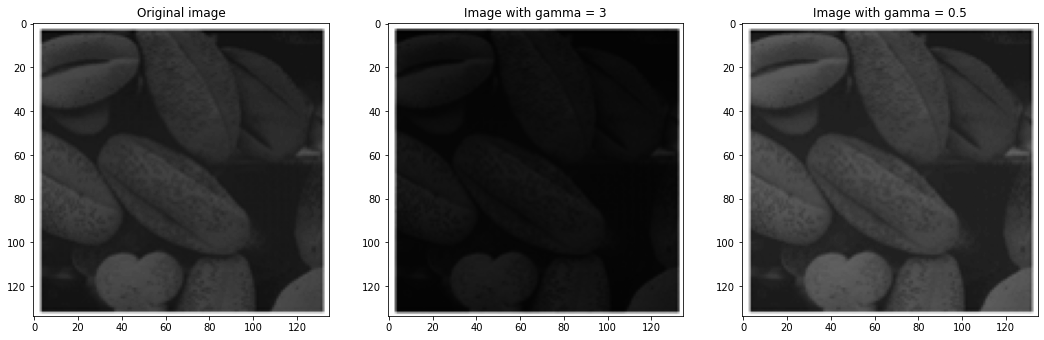

In [32]:
'''
3
Gamma Correction
'''

def gamma_correction(image, c, gamma):
    transformed_image = np.zeros(image.shape)
    for i in range(0, transformed_image.shape[0]):
        for j in range(0, transformed_image.shape[1]):
            transformed_image[i][j] = c * (image[i][j] ** gamma)
    return transformed_image

show_images([image2, gamma_correction(image2, 1, 3), gamma_correction(image2, 1, 0.5)],
            ['Original image', 'Image with gamma = 3', 'Image with gamma = 0.5'])

# Decreasing gamma makes the image more dark (if the color values are represented from 0 to 1)
# Because by increasing the raised power to a fraction number the number gets smaller (darker pixel)

In [37]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
pout_image = io.imread('imgs/pout.tif')
tire_image = io.imread('imgs/tire.tif')
G = 256

def image_histogram(image):
    H = np.zeros(G)
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            H[image[i][j]] += 1
    return H

def histogram_equalization(image):
    H = np.zeros(G)
    H = image_histogram(tire_image)
    print(H[33])
histogram_equalization(tire_image)


TypeError: 'NoneType' object is not subscriptable